In [8]:
import pandas as pd
import numpy as np
import pickle
from pylab import bone, pcolor, colorbar, show, plot

In [2]:
df = pd.read_csv(r"E:\Deep learning UDEMY\P16-Self-Organizing-Maps\Self_Organizing_Maps\Credit_Card_Applications.csv")
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [29]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.astype("int64")

In [30]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
featured_X = sc.fit_transform(X)
featured_X[0]

array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ])

In [31]:
from minisom import MiniSom
som = MiniSom(10, 10, input_len = 15)
som.random_weights_init(featured_X)
som.train(featured_X, 100)

In [32]:
som.winner(featured_X[0])

(8, 0)

In [33]:
with open('som.p', 'wb') as outfile:
    pickle.dump(som, outfile)

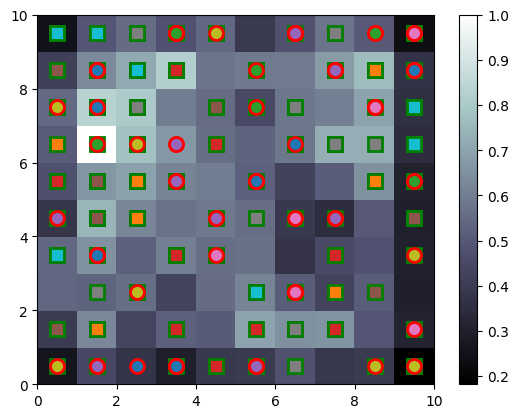

In [48]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o", "s"]
color = ["r", "g"]

for x, y in enumerate(featured_X):
    marker = markers[x % len(markers)]
    marker_color = color[x % len(color)]
    w = som.winner(y)
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         marker,
         markeredgecolor = marker_color,
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth=2
        )
show()